### Классификатор вина

Датасет содержит результаты химического анализа вин, выращенных в одном и том же регионе Италии, но полученных из трех разных сортов.
Анализ определил атрибуты, обнаруженные в каждом из трех сортов.

Цель: определить идентификатор класса

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [2]:
df = pd.read_csv('Wine_dataset.csv')
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Столбцы:

**Alcohol** - алкоголь

**Malic acid** - яблочная кислота

**Ash** - пепел

**Alcalinity of ash** - щелочность пепла

**Magnesium** - магний

**Total phenols** - общие фенолы

**Flavanoids** - флавоноиды

**Nonflavanoid phenols** - нефлаваноидные фенолы

**Proanthocyanins** - проантоцианы

**Color intensity** - интенсивность цвета

**Hue** - оттенок

**OD280/OD315 of diluted wines** - OD280/OD315 разбавленных вин

**Proline** - пролин



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

Все атрибуты непрерывны, нет пустых значений

In [4]:
# посмотрим описательные статистики
df.describe()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
#рапсределение по классам
df['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

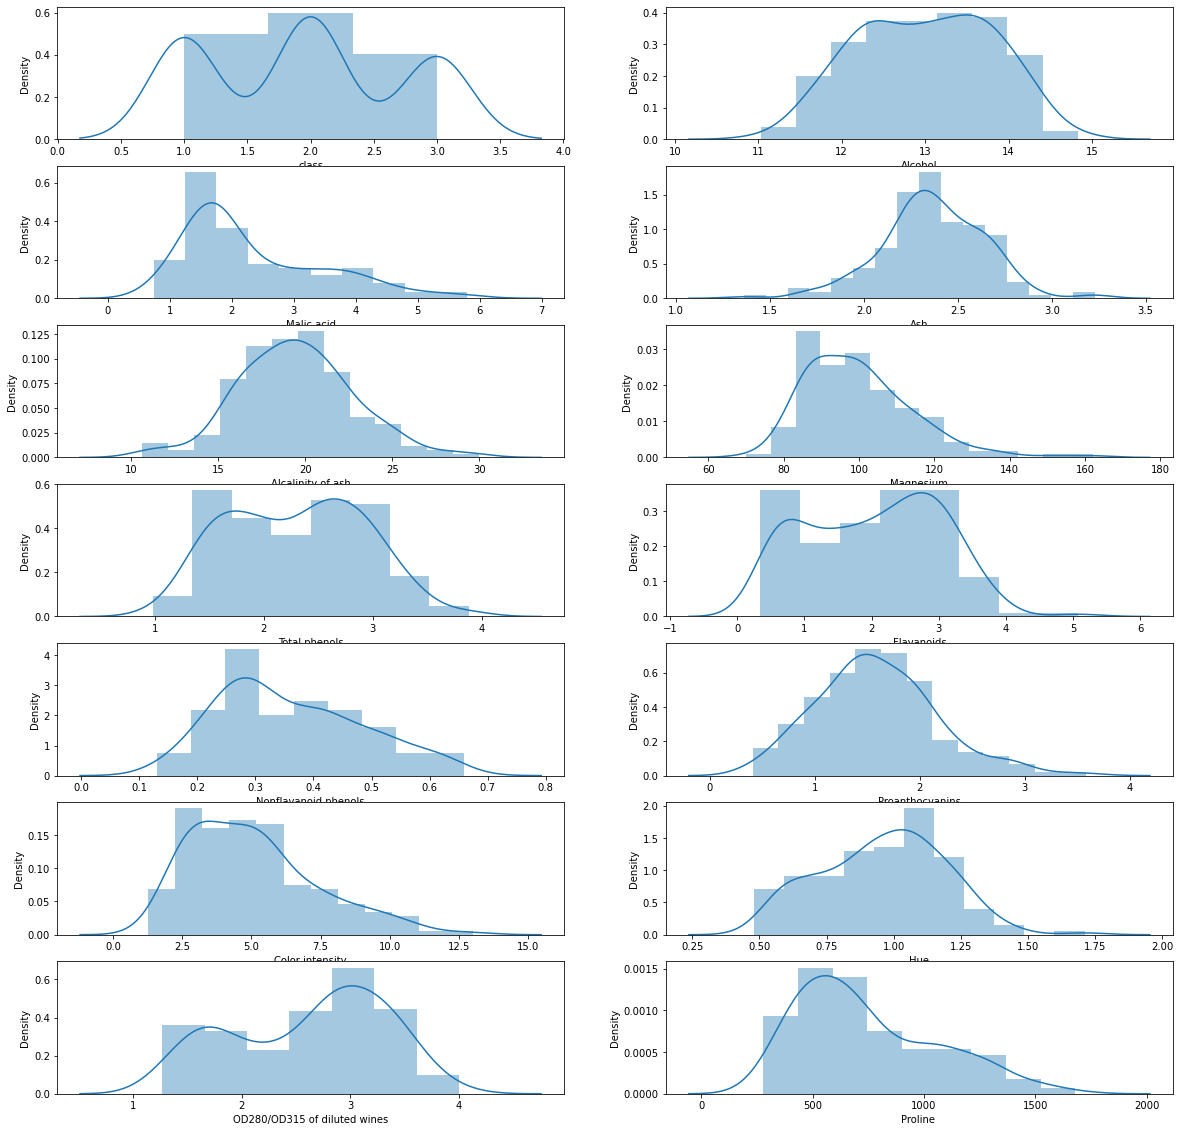

In [6]:
# посмотрим плотности распределения всех значений
fig, axes = plt.subplots(nrows = 7, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(20,20)

for ax, col in zip(axes, df.columns):
#    if col == 'is red':
#        continue
    sns.distplot(df[col], ax=ax)

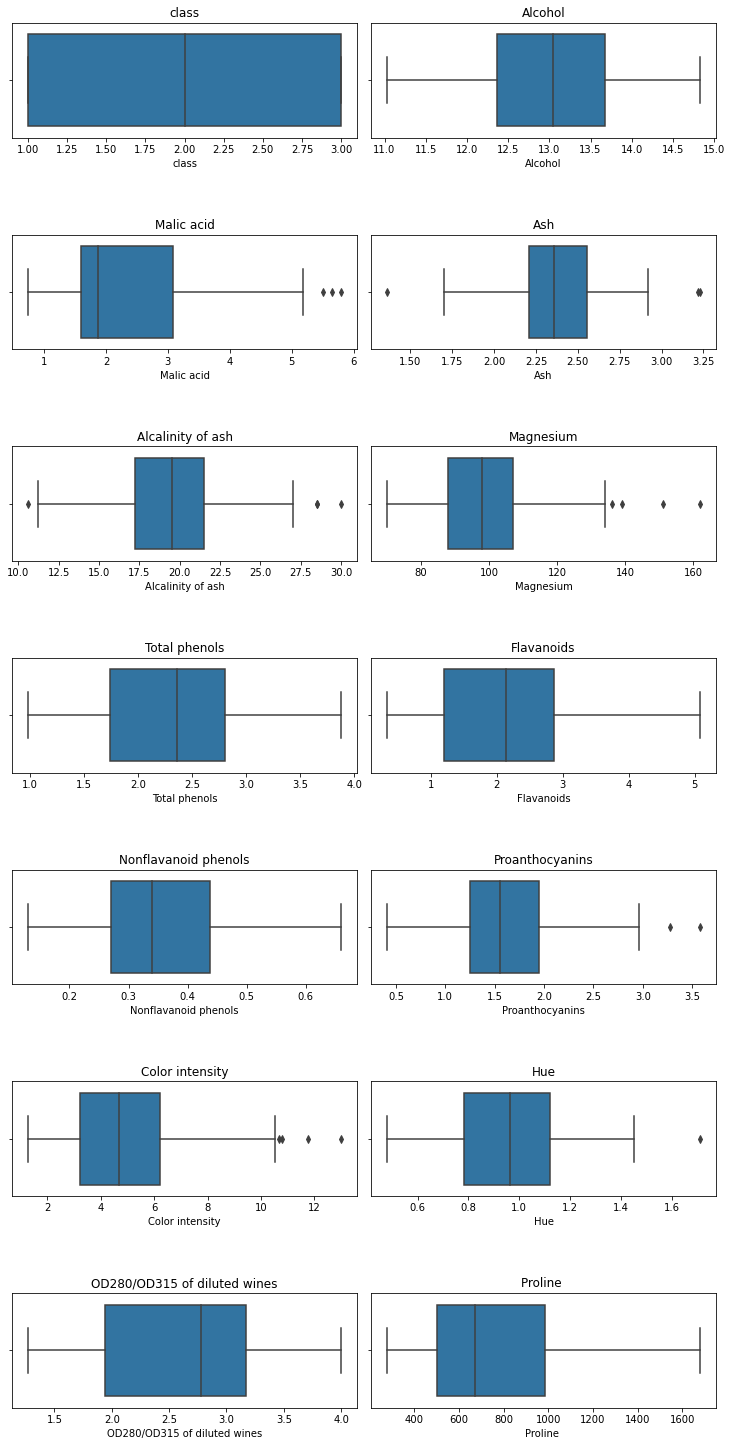

In [7]:
# посмотрим на выбросы, используя boxplot
fig, axes = plt.subplots(nrows = 7, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(10,20)

for ax,col in zip(axes, df.columns):
    sns.boxplot(df[col], ax=ax)
    ax.set_title(col)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



In [8]:
# посчитаем процент выбросов (1.5 межквартильных диапазона)
for k,v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5*irq) | (v >= q3 + 1.5*irq)]
    perc = np.shape(v_col)[0] * 100 / np.shape(df)[0]
    print('Выбросы %s = %.1f%%' % (k, perc))

Выбросы class = 0.0%
Выбросы Alcohol = 0.0%
Выбросы Malic acid = 1.7%
Выбросы Ash = 1.7%
Выбросы Alcalinity of ash = 2.2%
Выбросы Magnesium = 2.2%
Выбросы Total phenols = 0.0%
Выбросы Flavanoids = 0.0%
Выбросы Nonflavanoid phenols = 0.0%
Выбросы Proanthocyanins = 1.1%
Выбросы Color intensity = 2.2%
Выбросы Hue = 0.6%
Выбросы OD280/OD315 of diluted wines = 0.0%
Выбросы Proline  = 0.0%


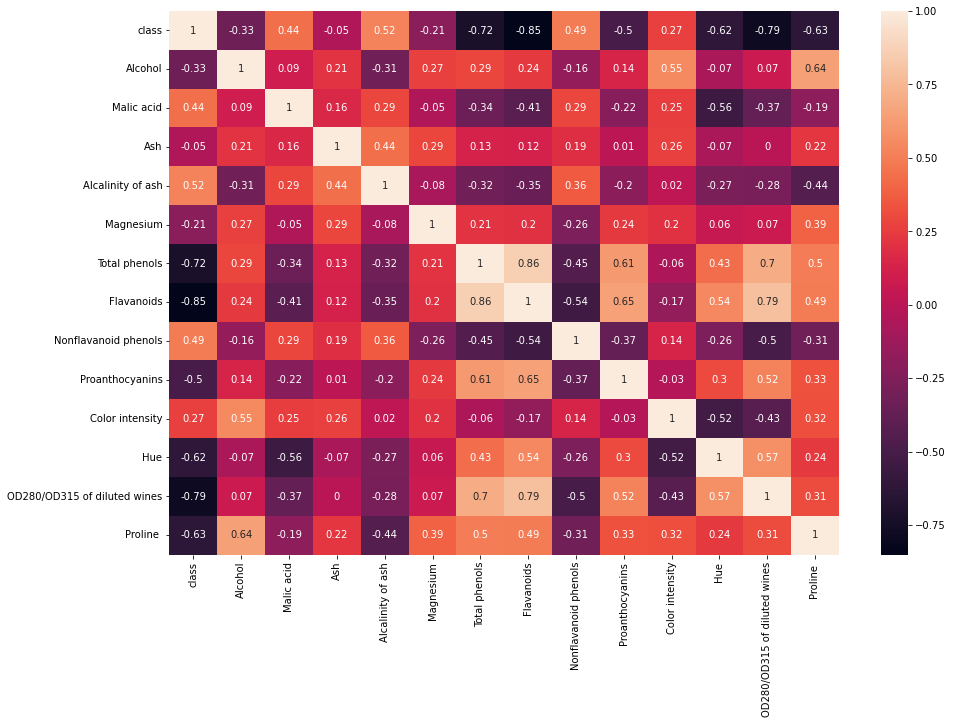

In [9]:
# построим матрицу корреляций
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

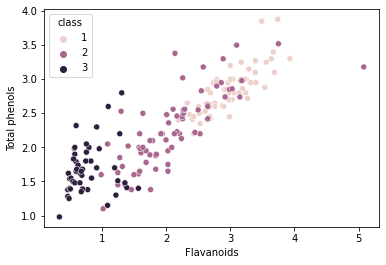

In [10]:
# построим точечные графики для сильно коррелированных атрибутов
sns.scatterplot(data = df, x = 'Flavanoids', y = 'Total phenols', hue = 'class')
plt.show()

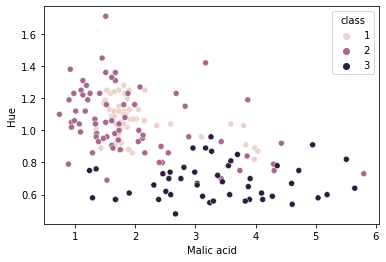

In [11]:
sns.scatterplot(data = df, x = 'Malic acid', y = 'Hue', hue = 'class')
plt.show()

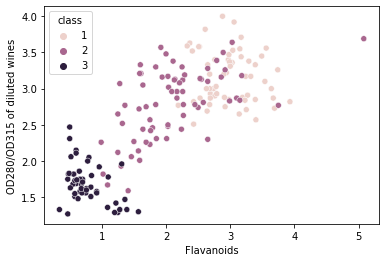

In [12]:
sns.scatterplot(data = df, x = 'Flavanoids', y = 'OD280/OD315 of diluted wines', hue = 'class')
plt.show()

### Построение модели

In [13]:
X = df.drop(['class'], axis = 1)
y = df['class']

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
# делим данные на тестовые и тренировочные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [16]:
# масштабируем данные
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [17]:
#логистическая регрессия
lr_classifier = LogisticRegression(solver='liblinear').fit(X_train, y_train)
lr_pred = lr_classifier.predict(X_test)
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [18]:
#метод случайного леса
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [19]:
#k ближайших соседей 
kn_classifier = KNeighborsClassifier(n_neighbors=5) 
kn_classifier.fit(X_train, y_train)
kn_pred = kn_classifier.predict(X_test)
print(classification_report(y_test, kn_pred))



              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



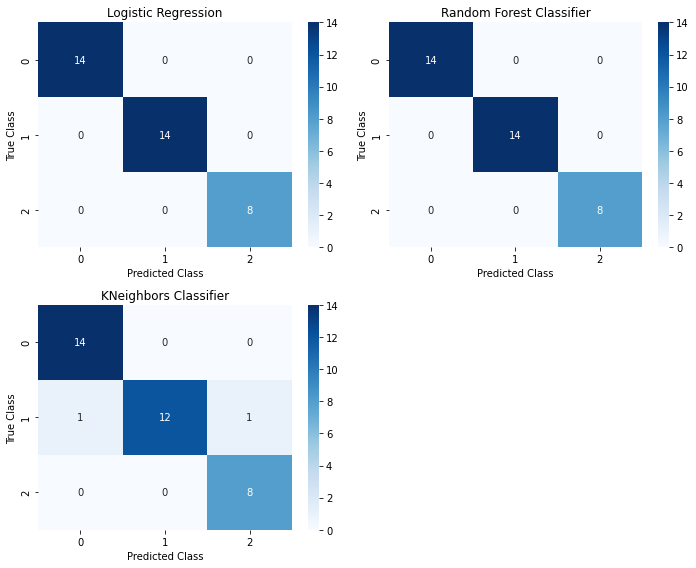

In [20]:
#сравним матрицы ошибок для каждого метода
lr_cm = confusion_matrix(y_test, lr_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
kn_cm = confusion_matrix(y_test, kn_pred)

plt.figure(figsize=(10, 8))

plt.subplot(221)
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Logistic Regression')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.subplot(222)
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Classifier')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.subplot(223)
sns.heatmap(kn_cm, annot=True, cmap='Blues', fmt='g')
plt.title('KNeighbors Classifier')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.tight_layout()
plt.show()